# Author: Ayushi Kumari

## Task 6: Prediction using Decision Tree Algorithm

## GRIP @ The Sparks Foundation

#### - *The given ‘Iris’ dataset, I have to created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.*

# Importing the required libraries

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Step 1: Loading the Dataset

In [2]:
# Loading and reading the Iris dataset 
data = pd.DataFrame(pd.read_csv("iris.csv"))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Exploratory Data Analysis

In [3]:
# Check the shape of dataset
data.shape

(150, 6)

In [4]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Describe Dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Describe categorical values of columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
Species,150,3,Iris-setosa,50


## Step 3: Cleaning the dataset

In [7]:
# Look for missing values / Null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Checking for any duplicated values
data.duplicated().sum()

0

In [9]:
# Remove the Id column, Id column will not add any value to prediction 
data.drop(labels=['Id'],axis=1,inplace=True) 

### *Observations:*

**1.** Data size is (150, 6).

**2.** None of the columns has Null values.

**3.** There is 0 duplicated value in this dataset .

**4.** Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm has numerical values .

**5.** Species column has categorical values.

## Step 4: Data Visualization comparing various features

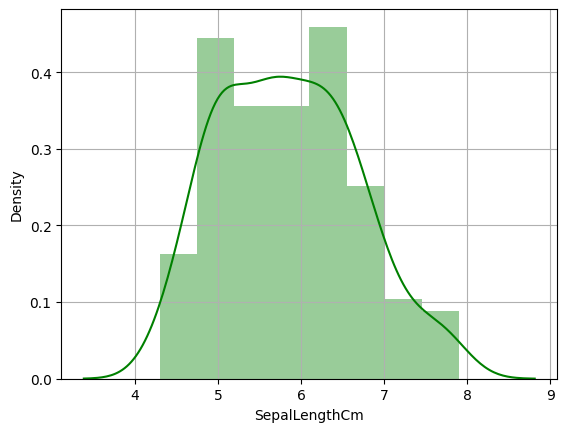

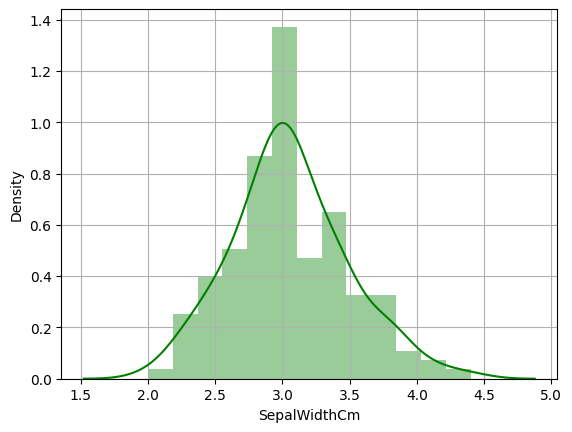

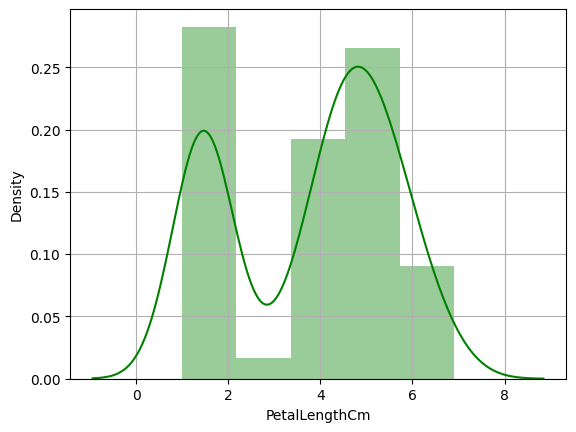

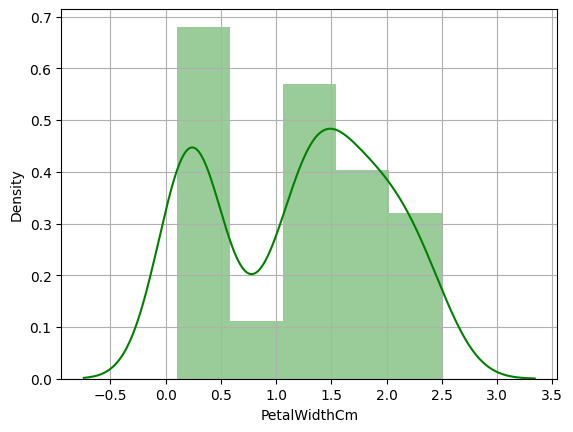

In [15]:
# Visualize the dist plot of all the numeric variables
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="green")  
    plt.grid(True)
    plt.show()

### *Observations:*

The Distplot of SepalLengthCm,and SepalWidthCm column are approximately normally distributed. And if we see other columns like PetalLengthCm, and PetalWidthCm these are not normally distributed.

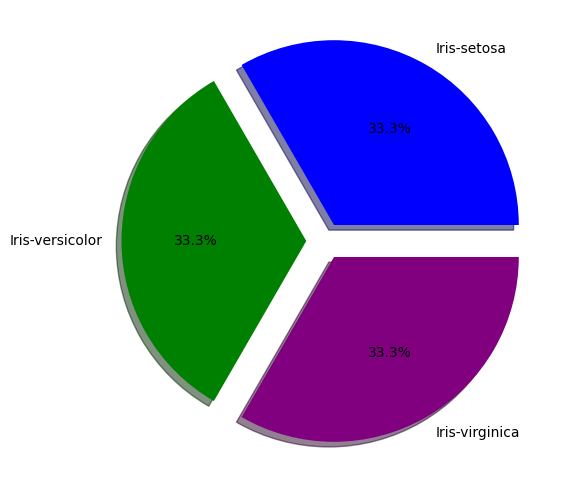

In [17]:
# Visualize the pie plot of all the categorical variables
plt.figure(figsize=(10,6))
labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
explode=[.1,.1,.1]
mycolors = ["blue", "green","purple"]
sizes=data.Species.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

### *Observations:*

Our Iris data was declared a balanced dataset when we observed that each class had an equal number of data points. In our sample, no Class completely dominates.

## Step 5: Data Visualization gives relationship between all the features

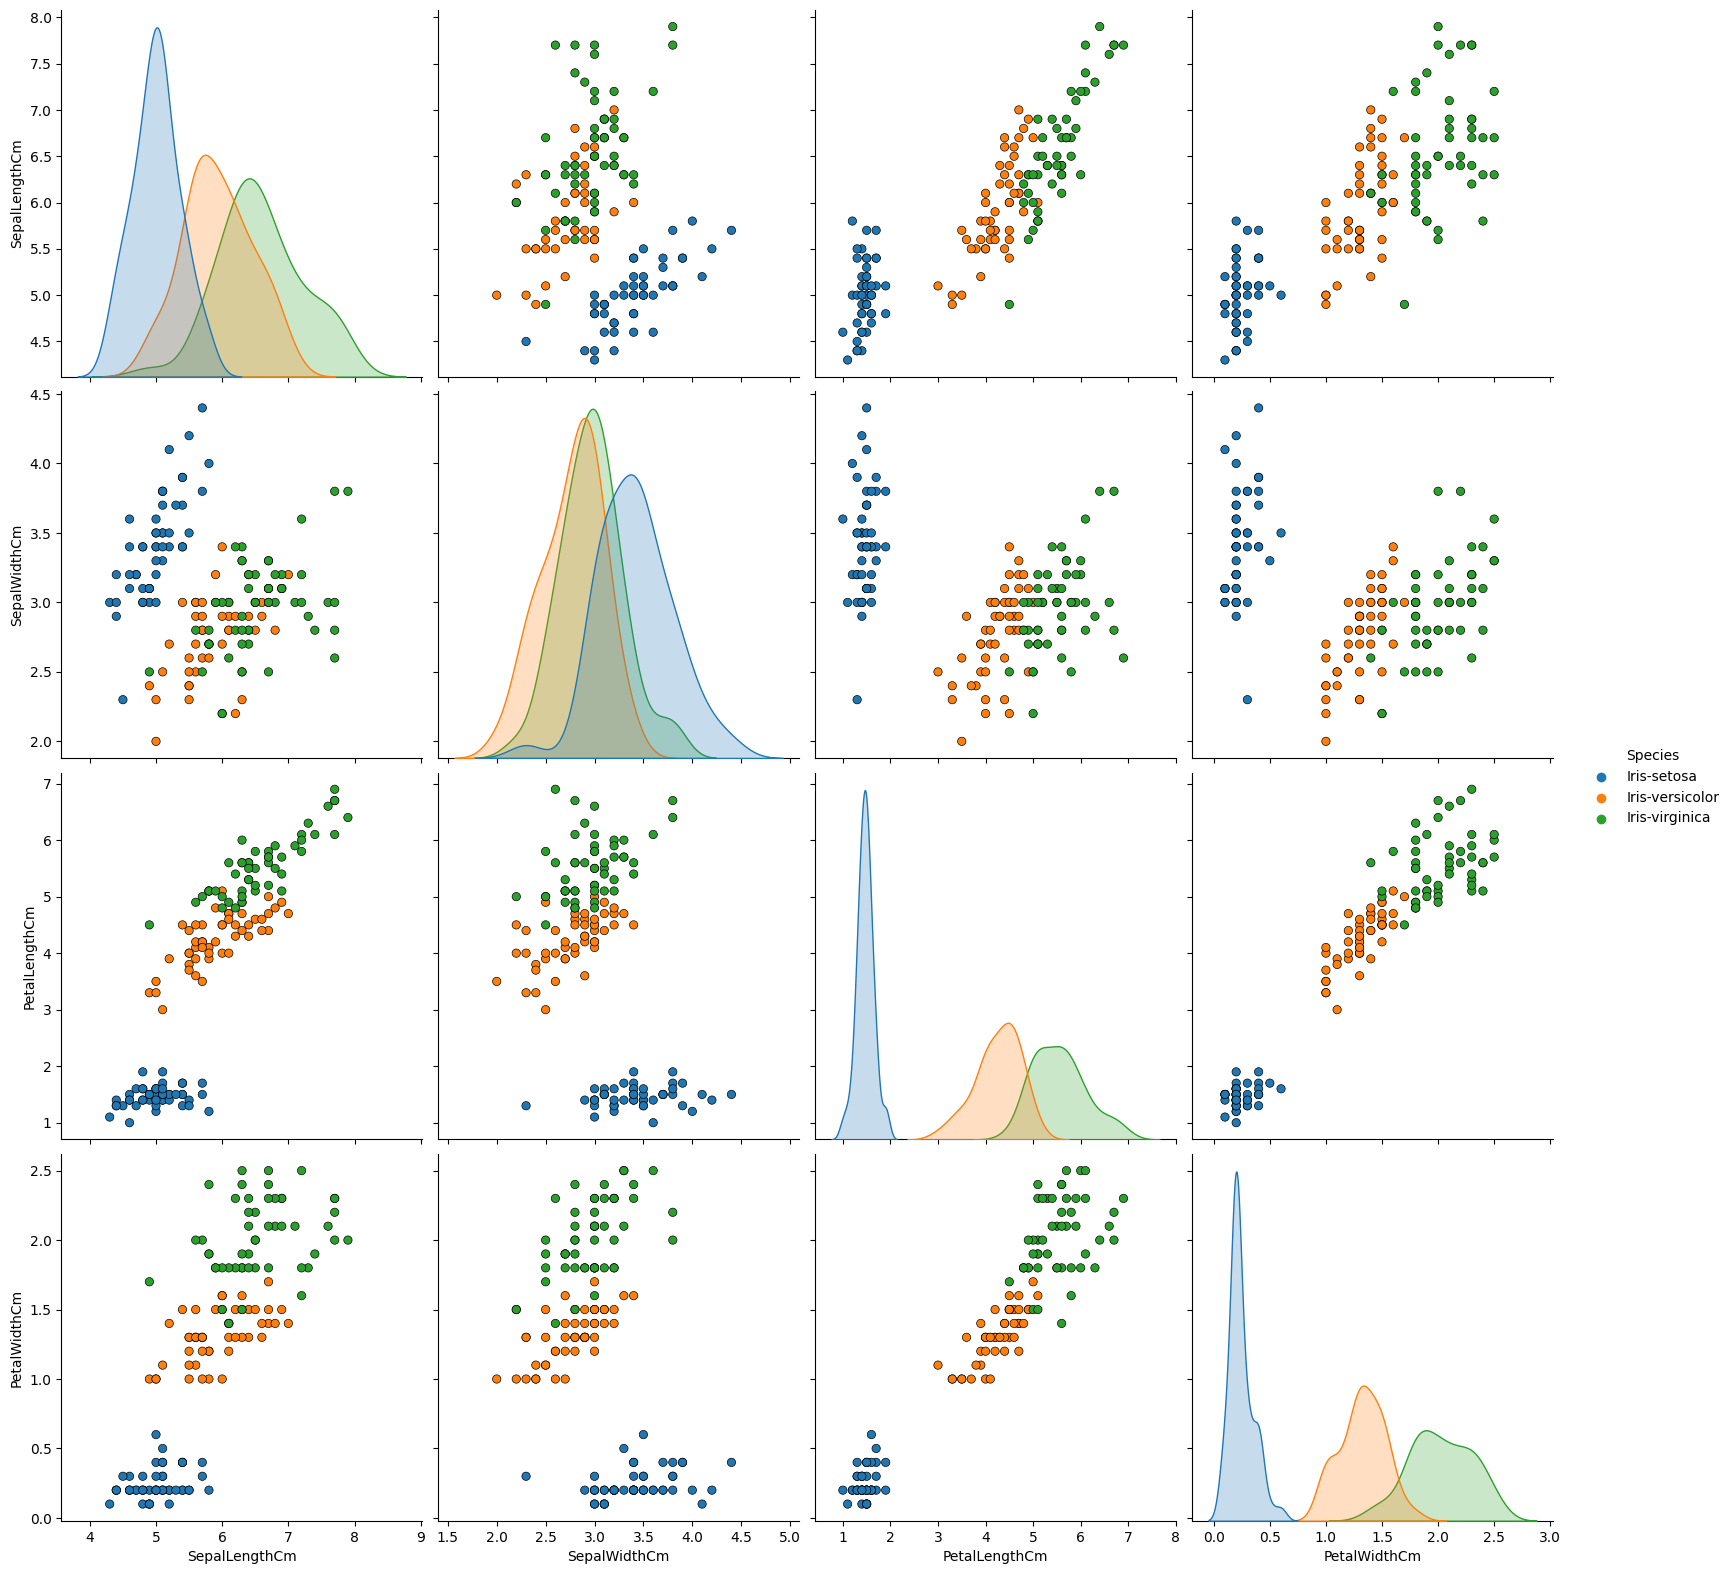

In [18]:
# Visualize the Pair plot gives the relationship between all features distribution with each other.
sns.pairplot(data, hue='Species', diag_kind = 'kde',
             plot_kws = {'edgecolor': 'k'}, size = 4)
plt.show()

### *Observation:*

By examining the pair plot results, we can be certain that all blue dots are clearly distinguished from the other two classes. But there is some overlap between virginica and versicolor.

We saw in the pair plot that some feature combinations had very little overlap between Versicolor and verginica, indicating that these features are crucial to the success of our classification work.

## Step 6: Visualization of Outlier Detection

Outliers are the values that look different from the other values in the data.

Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5(q3-q1)) and (q3+1.5(q3-q1)). Outliers, if any, are plotted as points left and right the plot.

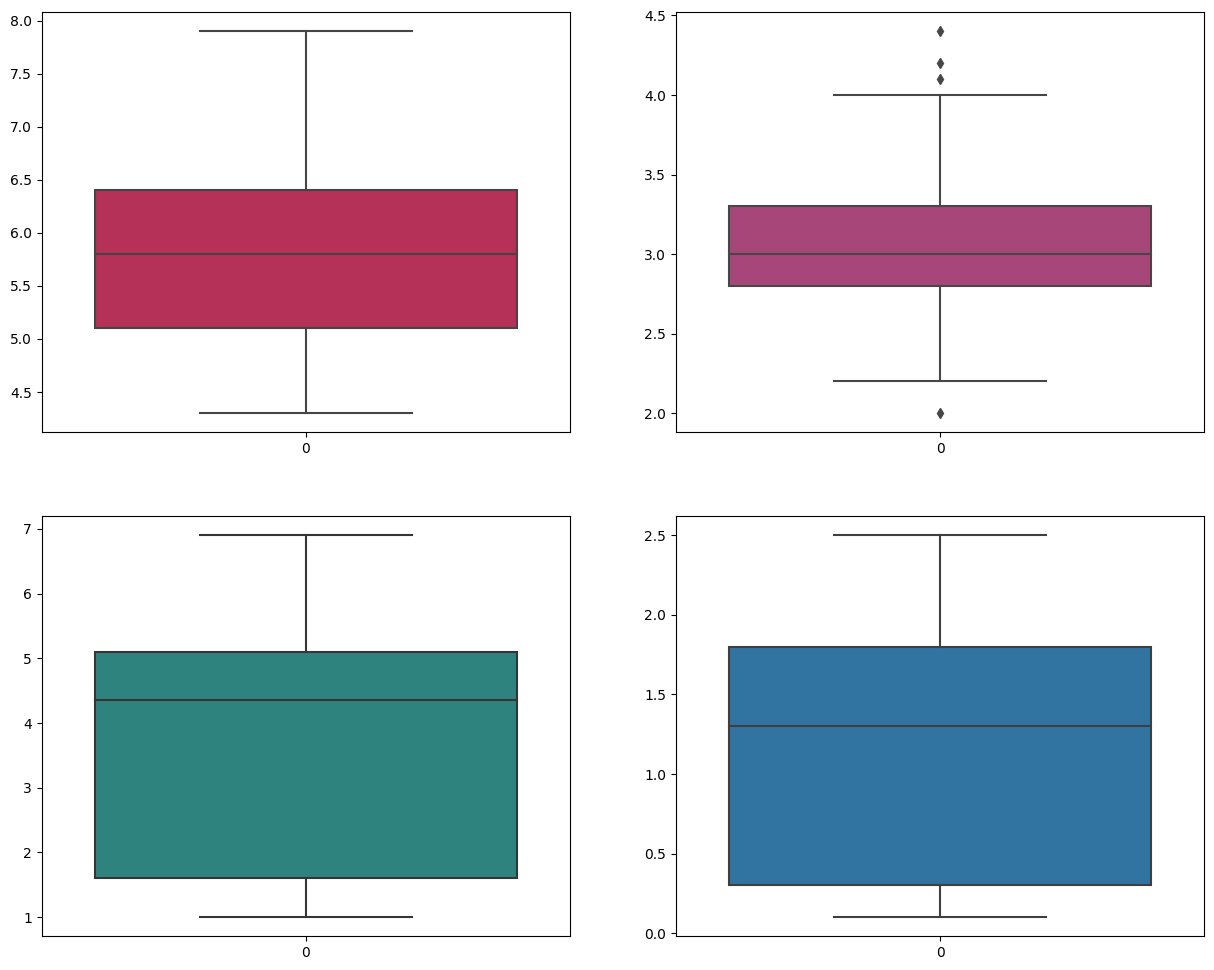

In [32]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (15,12))
plt1 = sns.boxplot(data['SepalLengthCm'], ax = axs[0,0],palette='rocket')
plt2 = sns.boxplot(data['SepalWidthCm'], ax = axs[0,1],palette='magma')
plt3 = sns.boxplot(data['PetalLengthCm'], ax = axs[1,0],palette='viridis')
plt1 = sns.boxplot(data['PetalWidthCm'], ax = axs[1,1])

plt.show()

### *Observation:*

**1.** SepalWidthCm have considerable some outliers.But these and not big number of outliers.

**2.** We are not droping the outliers as we don't have much data.

## Step 7: Exploring distribution plot for all the features

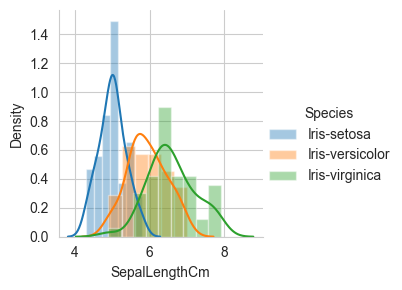

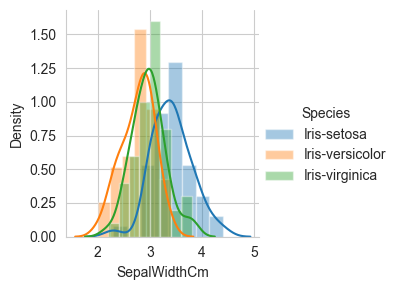

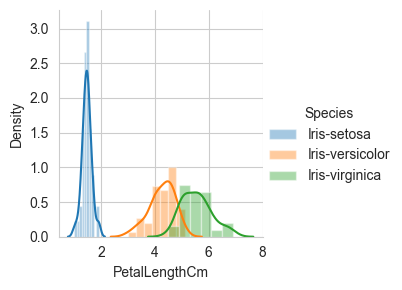

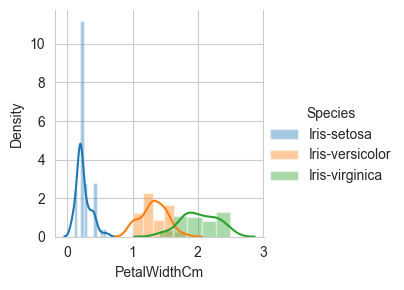

In [33]:
# Visualization of Dist plot
for i in data.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

## Step 8: Mapping the target variable in numeric values

In [34]:
# Mapping the variables
data['Species']=data['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Step 9: Data Spliting of the target variables

In [35]:
#split dataset in features and target variable
X = data.drop('Species',axis='columns')
y = data['Species']

In [61]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Step 10: Decision Tree Model Training

In [62]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the classifier 
classifier = DecisionTreeClassifier()

# fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

## Step 11: Visualizing the Decision Tree Model

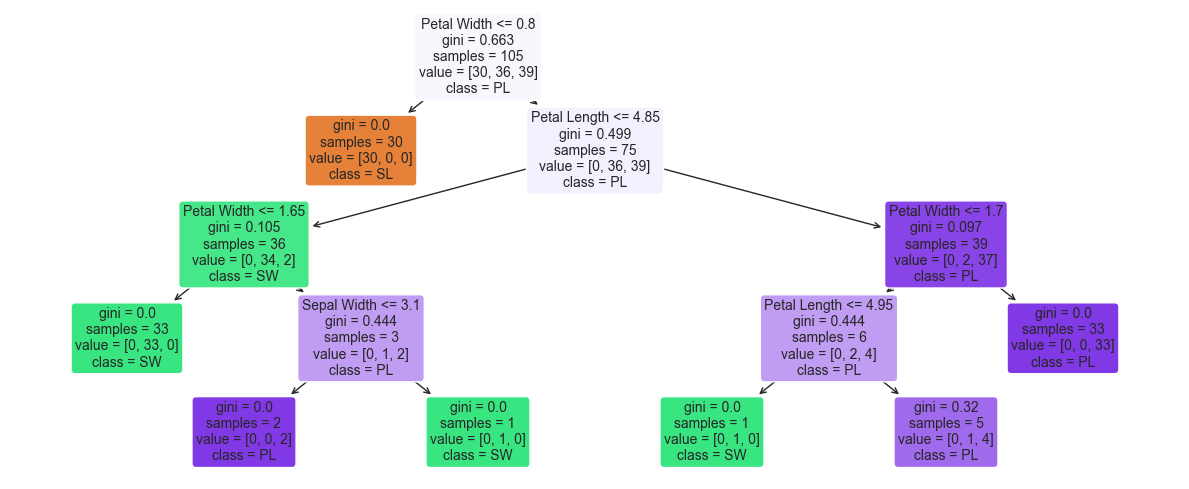

In [79]:
# Visualizing the trained Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
TARGET_NAMES = ['SL','SW','PL','PW']
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
plt.figure(figsize=(12,5))
plot_tree(model,fontsize=10,feature_names=FEATURE_NAMES,class_names=TARGET_NAMES,rounded=True,filled=True)
plt.tight_layout()
plt.show()

## Step 12: Calculating the Decision Tree Model accuracy

In [75]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### *Observation:*

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.86      0.92        14
           3       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### *The accuracy of this model is 0.96% since I have taken all the four features of the iris dataset for creating the decision tree model.*

# Conclusion

### **I evaluated the accuracy score of the model and was able to make a successful carryout prediction using the Decision Tree Algorithm.**